# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
%matplotlib inline

# Numpy
import numpy as np
import numpy.random as rnd

#  Pandas
import pandas as pd

# Scikit learn imports for this NB (regression tools,linear and nonlinear)
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#  Basic python modules
import os
import requests
import codecs
import io

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figure

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def url_to_content (url,encoding='utf-8',bufferize=False):
    r = requests.get(url)
    content_raw = r.content
    # Content downloaded by request is a byte string.  We're pretty sure this one has this encoding
    content = codecs.decode(content_raw,encoding=encoding)
    if bufferize:
        return io.StringIO(content)
    else:
        return content

# Load and prepare Life satisfaction data

Before starting this exercise you should create a folder called `datasets` in the folder where this notebook is stored.  We will be placing various data files in that folder, and the code below is written so as to look there.  We will be making various subfolders in the `datasets` folder, and if you want, you can start by 
creating the first one right away. It's called `lifesat`.


The **Organization for Economic Cooperation and Development** (OECD) stats website  contains all kinds if economic statistics on countries in downloadable form, in particular in a very popular stripped-down spreadsheet format call ".csv" (for comma-separated values).  You will get a local copy.  The particular dataset we want is  the BLI data ("Better Life Index").  

In [57]:


notebook_lifesat_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/'
lifesat_url = notebook_lifesat_url0.replace('github', 'raw.githubusercontent')
lifesat_url = lifesat_url.replace('blob/','')

def load_lifesat_data (lifesat_url):
    oecd_file = 'oecd_bli_2015.csv'
    oecd_url= f'{lifesat_url}{oecd_file}'
    return pd.read_csv(oecd_url, thousands=',',encoding='utf-8')

oecd_bli = load_lifesat_data(lifesat_url)
print(len(oecd_bli))
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
print(len(oecd_bli))
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

3292
888


In [3]:
oecd_bli.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In the next cell we go through exactly the same processing steps we discussed for the data in the pandas module introduction part II notebook. To review the data, and the motivations for these steps,
please visit that notebook.

In the exercise ahead, we're going to take particular interest in the `Life satisfaction` score,  a kind of general "quality of life" or "happiness" score computed from a formula combining many of the indicators in this data. 

>Since 2002, the World Happiness Report has used statistical analysis to determine the world's happiest countries. In its 2021 update, the report concluded that Finland is the happiest country in the world. To determine the world's happiest country, researchers analyzed comprehensive Gallup polling data from 149 countries for the past three years, specifically monitoring performance in six particular categories: gross domestic product per capita, social support, healthy life expectancy, freedom to make your own life choices, generosity of the general population, and perceptions of internal and external corruption levels.

# Load, prepare, and merge the GDP per capita data

Elsewhere, on the world wide web, with help from Google, we find data about GDP  ("gross domestic product")
[here](http://goo.gl/j1MSKe).  Hit the download butten and place another csv file in the same
directory as the last data.

In [58]:
# Downloaded data from http://goo.gl/j1MSKe (=> imf.org) to github
def load_gdp_data ():
    gdp_file = "gdp_per_capita.csv"
    gdp_url = f'{lifesat_url}{gdp_file}'
    return pd.read_csv(gdp_url, thousands=',', delimiter='\t',
                                 encoding='latin1', na_values="n/a")
    
gdp_per_capita = load_gdp_data()

In [12]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [59]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
# Make "Country" the index column.  We are going to merge data on this column.
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats["Constant"] = 1
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


Notice that when we did this merge, we lost some rows, in particular, countries for which we have GDP information, but no happiness stats.  Consider Cypress.

In [14]:
cyprus_gdp_per_capita  = gdp_per_capita.loc["Cyprus"][["GDP per capita"]]
cyprus_gdp_per_capita 

GDP per capita    22587.49
Name: Cyprus, dtype: object

But when we try to look up Cypress in the merged data, we get an error.  So as things stand now, we can't find out the quality of life score for Cypress.  We return to this problem below.

In [7]:
# This is a KeyError!
#full_country_stats.loc['Cyprus']

# Make a linear regression model

We are going to try to build a model that predicts life satisfaction from GDP.  The kind of model
we're going to use is called a **LInear Regression model**.

To start with, we are going to separate our country data into two sets, one set of countries which we use to train our model, and the other set which will be held back during training.  We call this second part of the data the **test set**.  We are going to ask our model to try to **predict** the life satisfaction of the test countries.  Let's choose 7 countries for the test, and since we have our countries sorted by GDP, let's pick 3 countries from the low end and 3 countries from the high end to test on.

In [60]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

#Train on this!
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#Test on this!
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [16]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [17]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


It's pretty easy to show that data like this has some potential for making accurate predictions.

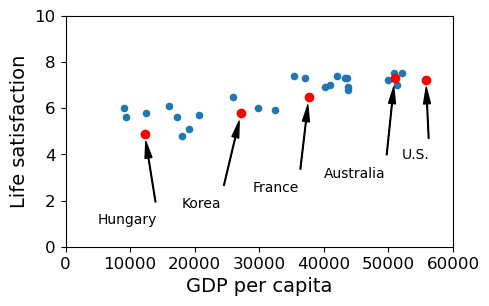

In [18]:
# Scatter all the points, using the pandas DF plot method.
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
# GDP 0-60K X-axis. LifeSat 0-10 Y-axis
plt.axis([0, 60000, 0, 10])
# Text positions need some eyeballing, and so are entered by hand. x = left edge of text
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    # Make these points red circles
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

As the GDP grows the Life satisfaction grows.  Over on the right, the life satisfaction of the US isn't quite where we'd expect it to be.  Although the US has a higher GDP than Australia, its life satisfaction trails behind.  But all in all, it's a pretty strong trend.  More money equals more happiness.

In [19]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


## Doing it by hand

In this notebook, we're looking at **linear regression models**.  A regression model is a kind of model that tries to
predict some dependent variable on the basis of one or more independent variables.  Sometimes we say
the model attempts to **explain** the dependent variable in terms of the independent variables.  A **linear regression
model** tries to predict with a linear model, a model that can actually be represented as a line or a plane
or a hyperplane on a plot.  In this notebook we'll study the simplest case, trying to predict one dependent variable
with one independent variable. In that case the line that represents the model can be drawn on 
a 2D plot.  For our dependent variable we'll use life satisfaction and for our independent
variable we'll use GDP.  So we're trying to explain life satisfaction in terms of GDP
with a linear model.

Let's try to draw some lines that capture the trends, just using our eyeballs.  
A line is defined by two numbers, a slope value $\theta_{1}$ and an intercept value $\theta_{0}$; $\theta_{0}$ is y-value at which the line intersects the y-axis; $\theta_{1}$ is the slope.  In the plot we draw the lines determined by some candidate linear regression models (some guesses at $\theta_{0}$ and $\theta_{1}$), together with a sample of points to evaluate the guesses.  The closer the lines are to the points, the better the model.

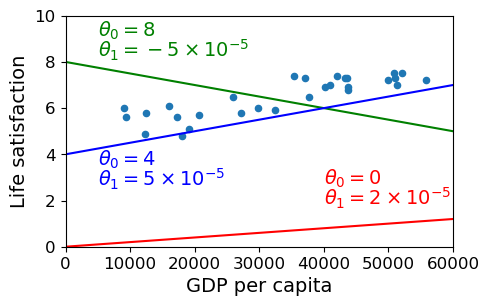

In [20]:
#import numpy as np

# The data
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# red line
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# green line
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# blue line
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

# Let's have this cell return nothing.  Just a display cell.
None

The blue line isn't bad.  Maybe we can do better if we use some math. 

## The scitkit_learn (aka sklearn) linear regression module

We load up the `sklearn` linear regression module and ask it to find the line that best fits our sample data.   

In [78]:
lin1.intercept_

4.853052800266435

In [81]:
lin1.coef_

array([4.91154459e-05, 0.00000000e+00])

In [21]:
from sklearn import linear_model

#Data
# Independent variable Must be DataFrame
Xsample = sample_data[["GDP per capita"]]
# Dependent variable (can be Series)
ysample = sample_data["Life satisfaction"]
#Create model
lin1 = linear_model.LinearRegression()
#Train model on data
lin1.fit(Xsample, ysample)
print(f"Training R2: {lin1.score(Xsample,ysample):.2f}")
# Here's the result of the learning.  In more dimensions, there will be more coefficients
theta0, theta1 = lin1.intercept_, lin1.coef_[0]
theta0, theta1

Training R2: 0.73


(4.853052800266436, 4.911544589158484e-05)

We will talk about the training R2 score below.  It looks promising but in this case
is quite misleading.

In [15]:
#from sklearn import linear_model

#Data
# Independent variable
#Xsample = sample_data[["GDP per capita"]]
# Dependent variable
#ysample = sample_data[["Life satisfaction"]]
#Create model
#lin1 = linear_model.LinearRegression()
#Train model on data
#lin1.fit(Xsample, ysample)

# Here's the result of the learning.
#theta0, theta1 = lin1.intercept_[0], lin1.coef_[0][0]
#theta0, theta1

Notice creating a `linear_model` produced a python object called `lin1`.  That's what we run the `fit` method on.  This method "fits" the model to the data.
After fitting, the `lin1` object has learned two numbers called the `intercept` and the `coefficient`.  These are the slope and intercept of the regression line.

Note that sklearn is fully integrated with pandas, but the training data passed in
must be a `DataFrame`. This is why the line defining `Xsamples`  must have two square brackets instead of just one:

In [22]:
type(sample_data[["GDP per capita"]]),type(sample_data["GDP per capita"])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Essentially the independent varuable data must be 2-dimensional.  The same would
hold true if we were passing in numpy arrays with one feature. In place of
training data with shape (n,), we would pass in data with shape (n,1),
reshaping the data if necessary.

We draw our data again with the line defined by the slope and intercept. Pretty good fit, eyeballing it.

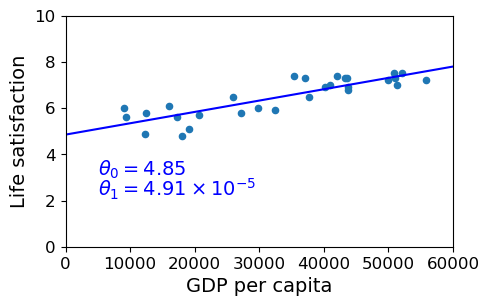

In [51]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, theta0 + theta1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
None


#### Predicting the Life Satisfaction Score for Cypress

First, let's try to predict the `Life Satisfaction` for a country we know the GDP of, which is missing from our
quality of life data, `Cypress`.

What we do is plug the GDP for Cypress into the model using the `predict` method, and it returns the
`Life Satisfaction` score predicted by the `scikit_learn` model, which is 5.96 or so.

In [52]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"][["GDP per capita"]]
# What we plug into the model
print(f"{'Model input GDP val:':<30} {cyprus_gdp_per_capita['GDP per capita']:>9,}")
cyprus_predicted_life_satisfaction = lin1.predict(pd.DataFrame({"GDP per capita":
                                                                cyprus_gdp_per_capita,
                                                               }))[0]
# What we get out
print(f"{'Model output lifesat score:':<30} {cyprus_predicted_life_satisfaction:>9.2f}")

Model input GDP val:           22,587.49
Model output lifesat score:         5.96


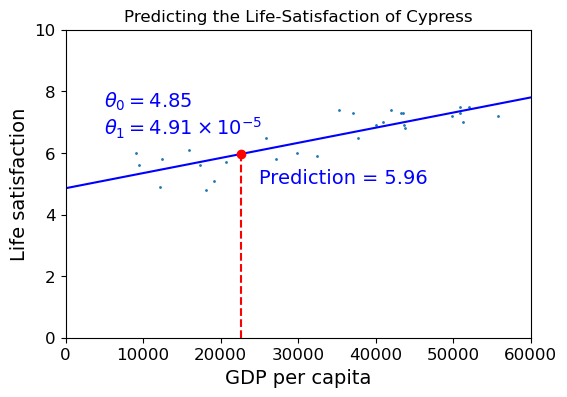

In [53]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(6,4))
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', ax=ax,s=1)
X=np.linspace(0, 60000, 1000)

# Plot the line our linear regression model learned.
ax.set_title("Predicting the Life-Satisfaction of Cypress")
ax.plot(X, theta0 + theta1*X, "b")
ax.axis([0, 60000, 0, 10])
ax.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
ax.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

# Plot a vertical red dashed line where the GDP of CYPRESS is. 
# It goes from the x axis right up to where our predicted happiness is.
ax.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")

ax.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
# Plot a fat red dot right where our predicted happiness is
# Notice it lands right on the line, and it has to, because our model just is the line.
ax.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.savefig("predicting_satisfaction.png")
#plt.show()

Look at the sample data that has around the same GDP as Cypress.

In [16]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [27]:
cyprus_gdp_per_capita

GDP per capita    22587.49
Name: Cyprus, dtype: object

Suppose we try to predict our life satisfaction by taking the average of these 3 points.

In [28]:
(5.1+5.7+6.5)/3

5.766666666666667

So you can see this estimate is lower than the 5.96 estimated by our model.  This is because the linear model tries for the best line that fits **all** the points, so it responds to the fact that there is a steady upward
trend with a particular slope, and because Spain falls below that line, it is treated as a point whose value has been reduced by **noise**. 

So far, so good.  But what we really need to do is TEST our model on some data it didn't see during
training, but for which we know the answers.  That was the point of setting aside some test data.

In [29]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [54]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

The cell below compares two models, the one we used before (the dotted blue line), trained on our data sample,
and another model trained on all the data (the solid black line).  The significant difference
between these models migfht be explained in three different ways, not necessarily mutually exclusive:  (a) the points we trained on before are not all that representative of the entire data set or (b) our test points are outliers (they sort of are if you look back at how we chose them);
or (c) the behavior of the data cannot be captured by a  linear model.  The fact that the model trained on all the data is still significantly off suggests that some of the error is  because of (c), although it does not eliminate
the possibility that noise plays a role.

| Mark  | Model trained on |Act/Pred |
|:-|:-:| :-:      |
| black line  |  train + test   | Pred     |
| dotted blue line  |  train    | Pred    |
| red squares   |      | Act test    |
| big blue dots  |      | Act train


The red squares are the actual locations of our test points.
The dot on the dotted blue line that lies 
directly above or below the red square is its predicted
value according to the model we trained before. If the red square lands directly on the 
dotted blue line, the model
got it it exactly right.  If the red square is some distance above the line (like "Brazil"),
the model's estimate is low; if the red square is some distance below the blue line (like "Luxembourg"),
the model's estimate is high.  


Which of the following statements about **the dotted blue
line** do the red dots provide evidence for?

  1.  Does the blue model underestimate or overestimate the happiness of poor countries?
  2.  Does the blue model underestimate or overestimate the happiness of rich countries?
 

In [56]:
missing_data

,GDP per capita,Life satisfaction,sq_err_poly,sq_err_lin
Country,,,,
Brazil,8669.998,7.0,9.936943e+00,1.073343
Mexico,9009.280,6.7,5.971153e-01,0.530216
Chile,13340.905,6.7,2.379451e-01,0.394087
Czech Republic,17256.918,6.5,1.558291e+00,0.113569
Norway,74822.106,7.4,5.020802e+17,0.009449
Switzerland,80675.308,7.5,6.602070e+19,0.017654
Luxembourg,101994.093,6.9,3.527976e+25,1.505483


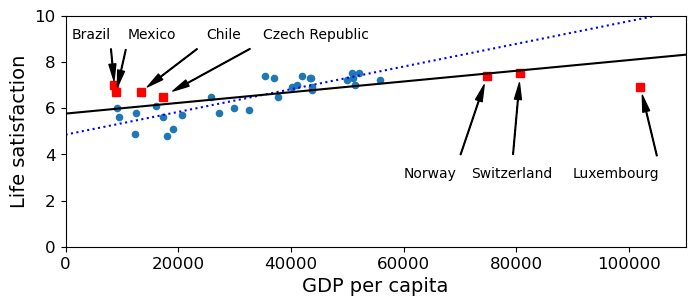

In [61]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
# Plot the dotted blue line
plt.plot(X, theta0 + theta1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = full_country_stats[["GDP per capita"]]
yfull = full_country_stats["Life satisfaction"]

# Now Train on the sample dataset
#pipeline_reg_lin.fit(Xfull, yfull)
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_, lin_reg_full.coef_[0]
X = np.linspace(0, 110000, 1000)
# Plot the black line
plt.plot(X, t0full + t1full * X, "k")

plt.show()

Which of the following statements about **the dotted blue
line** do the red dots provide evidence for?

  1.  Does the blue model underestimate or overestimate the happiness of poor countries?
  2.  Does the blue model underestimate or overestimate the happiness of rich countries?
 

Q1.  If we include both the training points (blue) and test points (red),  it does a fair bit of
both under estimate and overestimating. That is restricted to the poorer countries though.  

Q2.  The three richest countries are all in the test set, and the dotted blue model overestimates the happiness
of all three rich countries.  Indeed, so does the model trained on all the data, but not by as much.

# Other models

The next cell has some code computing a complicated model, one which does not have to be a line.
It is a higher order polynomial model which can curve up and down to capture all the data
points.  We can measure the aggregate error of a model on the training set by computing the distance of each actual point from
the curve/line of the model. By that definition,  the polynomial model
is reducing the "error" on the training set by a large amount.   But is it a better model?
Only the performance on a test set will tell us for sure.

Note:  The machine learning toolkit demoed here (`scikit_learn`) has a variety of robust regression
strategies implemented; see [Scikit learn docs](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py) for discussion.


**Pipeline**

We choose a degree, the highest exponent in the polynomial function we will use to make
predictions.  Below we choose 20.

1.  Polynomial features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree k. For example, if an input sample is two dimensional and of the form [a, b] (say using the two features GDP and employment), the degree-2 polynomial features are [$1, a, b, a^2, ab, b^2$].  
    What this notation means is that the model has to learn coefficients or **weights** to associate with each of these values such that when the following polynomial is summed, it gets as close as possible to the real life-satisfaction value:
    
    $$w_{1} + w_{2}a + w_{3}b + w_{4}a^{2} + w_{5}ab + w_{6}b^2$$
    
    These polynomial models have a lot of numbers to learn. For a 1-dimensional input model (one feature, GDP, in our case) and k=60, the model will compute 20 new feature values [1, a^2, ..., a^20] and need to learn weights for all of them.  If we used employment in addition to GDP, it would be a lot more.

2.  Scaler.  The standard scaler computes the **z-score**, that is, it maps each feature value x onto z where

    $$
    z = (x - \mu) / s
    $$
    
    where $\mu$ is the mean of the feature and $s$ is the standard deviation.  As we saw in the pandas module, this is known as centering and scaling. One motivation for scaling and centering is that it reduces the possibility of over- or under- valuing features with large/small value ranges. In a polynomial model some of the features are practically guaranteed to be of different scale than the others (because, for example, $x^20$ will generally be of a different order of magnitude than $x$), but scaling may help in any model with more than one independent variable.
    
3.  With the new features we still do a linear regression, just in a much higher dimensional space. In other words, the learning computation in the example depicted below is exactly the same as if we had 60 independent features instead of 1 value we had raised to 60 different powers.  In both cases it's a linear model.  In both cases, we seek to learn the weights that define a hyper plane that provides the least squared error solution. When we do a 2D plot of the predicted values our dimension-60 "linear" model assigns to our data (using the original data GDP feature as the X coordinate),  the predicted Life Satisfaction value is a sinuous curve, because the function determining the y-values is of course polynomial.
    
Note:  This is a pretty silly example but we use it to illustrate a simple point.  With a model 
with enough parameters (each of those Polynomial features gets its own coefficient), you can fit
anything.

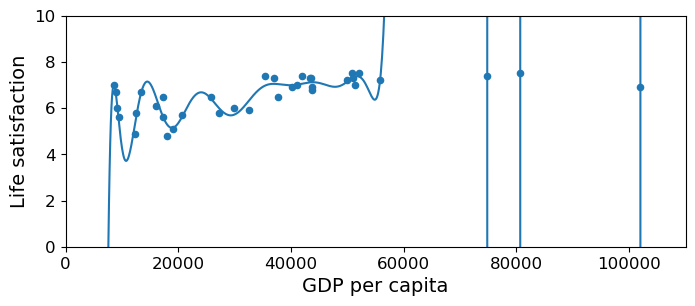

In [40]:
full_country_stats.plot(kind='scatter', x="GDP per capita", 
                        y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])



poly = preprocessing.PolynomialFeatures(degree=20, include_bias=True)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Train on the full GDP dataset for the sake of the picture
pipeline_reg.fit(Xfull, yfull)

# Pass in a large set of sample GDP values from poor to rich 
Xvals = np.linspace(0, 110000, 1000)
# ... as a DF as per training
X = pd.DataFrame(Xvals, columns=["GDP per capita"])
curve = pipeline_reg.predict(X)
plt.plot(Xvals, curve)
plt.show()

So this model **really** minimizes mean squared error.  It pretty much
threads the curve through every point.

But that's every point of the **training** set.  What about unseen data, the **test set**?

Let's evaluate by computing the mean squared error of the
polynomial and linear model when both are trained on the same training data
(with 6 outliers removed).

In [62]:
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Now Train on the sample dataset
pipeline_reg.fit(Xsample, ysample)

# Polynomial Model
#vals_poly = pipeline_reg.predict(missing_data["GDP per capita"].values[:,np.newaxis])
vals_poly = pipeline_reg.predict(missing_data[["GDP per capita"]])
# Compare predicted values to actual values
poly_mse = mean_squared_error (vals_poly[:], missing_data["Life satisfaction"])

# Linear Model
#vals_lin = lin1.predict(missing_data["GDP per capita"].values[:,np.newaxis])
vals_lin = lin1.predict(missing_data[["GDP per capita"]])
#vals_lin = pipeline_reg_lin.predict(missing_data[["GDP per capita"]])
lin_mse = mean_squared_error (vals_lin[:], missing_data["Life satisfaction"])

And now the results, with a fluorish:

In [63]:
print(f' Lin Model MSE: {lin_mse:.3e}')
print(f'Poly Model MSE: {poly_mse:.3e}')

 Lin Model MSE: 2.682e+00
Poly Model MSE: 5.040e+24


The mean squared error of the polynomial model is crazy bad!

By comparison, the mean squared error of the linear model is pretty reasonable!

To look into this, let's cook up a squared error function so as to look at the 
individual squared errors before the mean is taken.

In [64]:
def get_squared_error(predicted, actual):
    return (predicted - actual)**2

In [65]:
##  The general argument signature for evaluation metrics is
##  evaluation_metric(predicted_values,actual_values)
se_poly = get_squared_error (vals_poly[:], missing_data["Life satisfaction"])
# Save this to look at later.  
missing_data['sq_err_poly'] = se_poly
# Now take the mean of squared error (to compare with sklearn function)
mse_poly = se_poly.mean()
## pretty good egreement with sklearn's mean_squared_error function
mse_poly

5.039974893489065e+24

In [66]:
# Same for the linear model
se_lin = get_squared_error (vals_lin[:], missing_data["Life satisfaction"])
# Save this too look at later
missing_data['sq_err_lin'] = se_lin
# Get the mean of squared error
mse_lin = se_lin.mean()
# Also good agreement
mse_lin

2.681893248747465

What happened?

Here is our data with squared errors from the models appended.

In [67]:
#  Think about why the squared error columns are so nicely aligned with the original data
#  What Python type does get_squared_error error return?
missing_data

,GDP per capita,Life satisfaction,sq_err_poly,sq_err_lin
Country,,,,
Brazil,8669.998,7.0,9.936943e+00,2.962242
Mexico,9009.280,6.7,5.971153e-01,1.972487
Chile,13340.905,6.7,2.379451e-01,1.420155
Czech Republic,17256.918,6.5,1.558291e+00,0.638986
Norway,74822.106,7.4,5.020802e+17,1.272325
Switzerland,80675.308,7.5,6.602070e+19,1.730426
Luxembourg,101994.093,6.9,3.527976e+25,8.776632


What happened was on the three rich countries (Norway, Switzerland, and Luxembourg) 
the squared error skyrocketed for the polynomial model.

Looking back at the original picture of the polynomial model
points to the source of the problem. The curve of the polynomial model swings wildly
up and down in order to thread its way through the life-satisfaction scores for all training data countries,
and the training data leaves it on an upswing.

We can observe the polynomial model's model's upward swing by drawing a picture in which the x-axis goes well beyond the GDP values the model was trained on, and that's where the predicted life-satisfaction scores skyrocket.

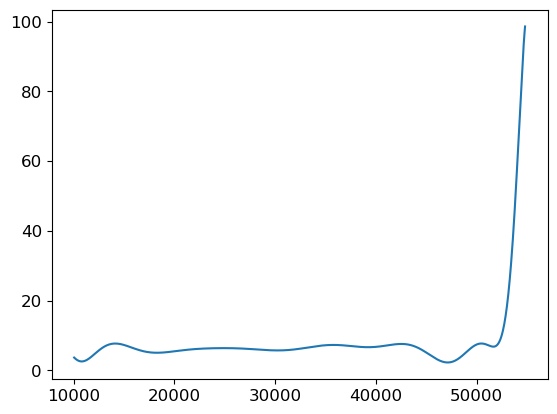

In [68]:
pipeline_reg_full = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Train on the full GDP dataset for the sake of the picture
pipeline_reg_full.fit(Xsample, ysample)

# Pass in a large set of sample GDP values from poor to rich
Xvals0 = np.linspace(Xsample.min()+1000, Xsample.max()-1000, 1000)
X0 = pd.DataFrame(Xvals0, columns=["GDP per capita"])
# predict expects a 2D array.  Make our 1D array X a 1000x1 2D array
#curve = pipeline_reg.predict(X[:, np.newaxis])
curve = pipeline_reg_full.predict(X0)
plt.plot(Xvals0, curve)
plt.show()

The polynomial model  minimized the squared error on whatever training set it was given but 
it missed the general trend.
As a result, it performed terribly on unseen data.  This is known as **overfitting** or **overtraining**.

This is the danger of very powerful models.   In basically memorizing the training set, they
sometimes fail to learn the key generalization that will help cope with unseen data.

### A Note:  Evaluating Regression models ($R^2$ vs MSE)

A final note on evaluation.   We have been using mean squared error (MSE) as our chief 
tool for evaluating regression models.  As a first approximation it is useful. It
is intuitive and, so far, it has given us results that make sense.  

But in practical applications it is wise to use another measure $R^{2}$ (or `r2_score`
in the `sckit learn` metrics, or **coefficient of determination** as it's sometimes called). 

The $R^2$ score is a number less than 1 that, in the general case, represents the proportion of variability in $y$ that can be "explained" by the regressor variables.  $R^2 = 1$  means that all the variability is explained.  The model is a perfect fit.  
A value of 0 results when the sequence of predictors
is constant and is always the mean of the true values.
The $R^2$ value can be negative (as it is
in our case), when the model performs worse than a model that always predicts the mean.

Unlike `mean_squared_error`, it's not symmetric, and the arguments
must be passed in this order: `r2_score(true_values, predicted_values)`.

What does explaining variance mean?  We'll try to convey the main idea by doing two things.
First instead of talking about variance per se, we'll talk about
summed squares.  The squares we're summing look like this:

$$
\text{TSS}{}_{\text{Z}} = \sum_{i=1}^{n} (z_{i}-\overline{z})^2
$$

Here $z$ is a value for  some variable $Z$ in our sample and 
$\overline{z}$ is the mean value for $Z$.  So we're summing the 
the squares of the differences between each $z$ and the mean.
And if we sum over the entire sample, we call the result
**Total Summed Squares** (TSS). The TSS of of a variable $Z$ gives
us a handle on the **scale** of the variation: How
far do values typically get from the mean of $Z$?  Are we
talking about a $Z$ whose values can differ by 10s,
100s, or 1000s?  To compute the **Total Variance** (TV), divide TSS
by N-1, where N is the size of the sample. 

Second to evaluate a model that tries to
predict values for $Z$, we'll use what's called the ANOVA decomposition of TSS:

$$
 (1) \underbrace{\sum_{i=1}^{n} (z_{i}-\overline{z})^2}_{\text{TSS}} =
 \underbrace{\sum_{i=1}^{n} (z_{i}-\hat{z})^2}_{\text{RSS}} + 
 \underbrace{\sum_{i=1}^{n} (\hat{z}_{i}-\overline{z})^2}_{\text{ESS}}
$$

In this equation, we have data whose
actual values we'll call $z$ and 
a model whose predicted values we'll call $\hat{z}$. 
The TSS is the sum of the **Residual Summed Squares** (what is
unaccounted for by the model) and the ESS is the **Explained Summed Squares**
(what is accounted for by the model).


If the model is good, the difference between $\hat{z}$
and $z$ (the actual value) is small.  In that case 
the RSS term (the residual or unexplained summed squares) will be 
a relatively small part of the right-hand side, and almost all of the TSS
will be accounted for by the ESS term. 
If the model is bad,  most of the TSS will be due to the RSS, often just referred to as the residuals.

We talk about model evaluation
in terms of the TSS in order to have some handle on  what counts as a small difference between the predictions
and reality and what counts as as a big difference. An
RSS of 100 is terrible when the TSS is 200 and wonderful when TSS is 10_000;
in other words, we want a model that makes the
ESS term a large percentage of the TSS. We might refer to 
that as explaining a large percentage of the Total Summed Squares.
That is, in a wonderful model the following will be large.

$$
(2)\,\,\text{Percent TSS Explained} = \frac{\text{ESS}}{\text{TSS}}
$$

We're now ready to define percentage of Total Variance explained.
To talk about Total Variance instead of summed squares we divide 
ESS and TSS by N-1:

$$
\begin{array}[t]{lcl}
\text{TV} & = & \frac{\text{TSS}}{\text{N-1}}\\
\text{EV} & = & \frac{\text{ESS}}{\text{N-1}}\\
\end{array}
$$

That leaves the fraction on the right hand side of (2) unchanged,
so let's just write 
the definition of **Percent Variance Explained** using ESS and TSS:

$$
\begin{array}[t]{lcll}
(A) & \text{Percent Variance Explained} = \frac{\text{ESS}}{\text{TSS}}
\end{array}
$$

Now in real life given some data and a model we only have our
hands on the mean of a sample, not the true mean,
so this can be more usefully written using the following consequence of (1)

$$
\begin{array}[t]{lcll}
(1') & \text{TSS}/\text{TSS} & = & \text{RSS}/\text{TSS} + \text{ESS}/\text{TSS}\\
     & 1  & = & \text{RSS}/\text{TSS} + \text{ESS}/\text{TSS}\\
\end{array}
$$

That means:

$$
\begin{array}[t]{lcll}
   & \text{Percent Variance Explained} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{array}
$$

And finally, $R^2$, as we said, measures Percent Variance Explained. In fact:

$$
\begin{array}[t]{lcll}
(3) & \text{R}^{2} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{array}
$$

Note that although we've defined $R^2$ as Percent Variance
Explained, this formula is actually not equivalent to (A)
above.  (A) can't be negative, which seems reasonable,
because of the way we normally use percentages, they can't be
negative.  However, the way people use
$R^2$ (and the way we're using it in this notebook) it definitely can be negative.  The big
advantage of equation (3) is that it allows $R^2$ to be negative,
as we'll see.  So equation (A) stands as a reasonable definition
of Percentage of Variance explained, but Equation
(3) is what we want when working with $R^2$.

Summing this up: To compute Percent Variance Explained, or $R^{2}$,
we look at the difference between our predictions and our actual
values ($z_{i}-\hat{z}_{i}$), square those, sum the squares, and get our residuals RSS.
Then we compute TSS, summing the distances of the $z_{i}$ from
the mean ($(z_{i}-\overline{z})^2$). Then we subtract $ \frac{\text{RSS}}{\text{TSS}}$
from 1.  

For concreteness let's say our model is a linear model like the
regression models we've been talking about.  If the model is good
that means the data points in our $Z$-sample (our $z_{i}$) all lie 
on or very close to the model line. The points on the line are our predicted values ($\hat{z}_{i}$);
so if the $z_{i}$ are close to the $\hat{z}_{i}$,  $(z_{i}-\hat{z})^2$
(RSS) will be small.  That means a large percentage of the Variance is
explained by the model and $R^{2}$ will be close to 1.

$R^{2}$ is a key concept 
in model evaluation.  The other key concept is RSS or the sum of the squared errors
of the model. Taking the mean of that gives us the **mean squared error** (MSE),
which is what we've been using to evaluate our regression models.

So let's review what we said about $R^2$ in light of equations (1)
and (3):

1. When is $R^2$ equal to 1?  When $\frac{\text{RSS}}{\text{TSS}} = 0$;
   that is, when there are no errors.  The model is a perfect fit. 

2. When is $R^2$ equal to 0?  When $\frac{\text{RSS}}{\text{TSS}} = 1$.
   that is, when $\frac{\text{ESS}}{\text{TSS}} = 0$.
   The model explains none of the variance.  The model can only do this
   by always predicting $\overline{z}$, so that $(\hat{z}_{i}-\overline{z})^2$
   is always 0.

3. When is $R^2$ negative?  When $\frac{\text{RSS}}{\text{TSS}} \gt 1$.
   that is, when the model's summed errors exceed the data's summed deviations from
   the mean.  No reason this can't happen.  There is no limit to how bad a model can be,
   and therefore no lower bound on $R^2$.  Another way of looking at this: there is
   no limit to how difficult a data set can be to model.

One drawback of $R^2$ is that it grows as the number of variables grows, so
$R^2$ with no modification is of no help in evaluating what happens
as predictor variables are added to the model. For this reason
people have cooked up something called **adjusted $R^2$**,
which corrects for this effect and gives
a truer measure of whether a new variable 
is informative.  We're not discussing that wrinkle here.

So below where we explore feature
choice we've used $R^2$ to illustrate its use, but we don't rely on it
to help evaluate the models.  You may want to try out this definition
of adjusted $R^2$.

To keep this discussion tidily in one place, 
here is the code for training and evaluating the regression model above
with `sckit learn` metrics, using both
`mean_squared_error` and `r2_score`.

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

#Data
# Independent variable Must be DataFrame
Xsample = sample_data[["GDP per capita"]]
# Dependent variable (can be Series)
ysample = sample_data["Life satisfaction"]
#Create model
lin1 = linear_model.LinearRegression()
#Train model on data
lin1.fit(Xsample, ysample)

vals_lin = lin1.predict(missing_data[["GDP per capita"]])

In [147]:
# vals_lin is  a 7x1 2D array.  mean_squared_error wants two 1D arrays or sequences,
# the predicted values and the actual values.  So we pass in the first column of vals_lin.
lin_mse = mean_squared_error (missing_data["Life satisfaction"], vals_lin)
# Same for r2 score
lin_r2 =  r2_score(missing_data["Life satisfaction"],vals_lin)
print(f' Lin Model MSE: {lin_mse:.3e} Lin Model R^2: {lin_r2:.2f}')

 Lin Model MSE: 2.682e+00 Lin Model R^2: -21.43


An important point: in evaluating an regression  system, we are often only interested in the $R^2$ score on test data. We can  compute that directly with

```python
lin1.score(missing_data[["GDP per capita"]],missing_data["Life satisfaction"])
```

Note that although both functions return $R^2$ values, the `.score()` method has a different argument signature from `r2_score`; the `.score()` method  takes the same kind of arguments as `.fit()`, a sequence of data points and a sequence of labels; while `r2_score` $R^2$ score takes the same arguments as
any scikit learn evaluation metric: the actual values and the predicted values.  Thus, to use
`r2_score` we must first use `.predict()` to generate some predictions; `.score()` folds that step in.

In [69]:
print(f'{lin1.score(missing_data[["GDP per capita"]], missing_data["Life satisfaction"]):.2f}')

-21.43


Note that the $R^2$ value is a negative number less than -1.  This means this
is a very bad model.  Technically what it means is that we would be better off 
predicting the mean life satisfaction score every time.  Let's try that:

In [70]:
md_mn = missing_data["Life satisfaction"].mean()
md_mn

6.957142857142856

In [71]:
# Create a 1D prediction array that always predicts the Life Satisfaction mean
mean_predictions = np.full(len(missing_data), md_mn) 

mn_mse = mean_squared_error (missing_data["Life satisfaction"], mean_predictions)

# Same for r2 score
mn_r2 =  r2_score(missing_data["Life satisfaction"],mean_predictions)

print(f'Mean Model R^2: {mn_r2:.2f} Mean Model MSE: {mn_mse:.3e}  Lin Model MSE: {lin_mse:.2f}')

Mean Model R^2: 0.00 Mean Model MSE: 1.196e-01  Lin Model MSE: 2.68


More generally, predictions normally distributed in a small region around the mean (i.e., the error variance is small) will earn  $R^2$ score near 0 but not equal to 0.

In [115]:
mean_predictions[0] = mean_predictions[0]+.1
mean_predictions[1] = mean_predictions[1]-.1
mean_predictions[2] = mean_predictions[2]+.3
mean_predictions[3] = mean_predictions[3]-.3

r2_score(missing_data["Life satisfaction"],mean_predictions)

-0.023890784982935065

In [116]:
ls_mn = sample_data["Life satisfaction"].mean()
num_samples = len(sample_data)
std = .01
# Equivalently: ls_mn + std * np.random.randn(num_samples)
new_predictions = np.random.normal(ls_mn,std,num_samples)
r2_score(sample_data["Life satisfaction"],new_predictions)

-0.011470230784547564

Using the mean model, the $R^2$ is 0 and the MSE is lower than the linear model MSE.

So the negative $R^2$ less than -1 means our learner is performing worse than the **baseline** system.
The concept of a baseline system is extremely useful in interpreting machine learning
results.  Define a simple-minded, low-information strategy for a regression or classification
problem and call that your baseline. Compute your evaluation score for that system and define that score as 0-level performance.  If your system can't beat that, it's not going to be useful.

What counts as a baseline score can generally vary from task context to task context.  One of the useful
properties of $R^2$ is that it's meaningful across a wide variety of contexts. Although what counts
as really good performance can take some interpreting, it gives us a good handle on what
terrible performance is.

Recall we called the `.score()` method  on our training data after training `lin1`:

In [72]:
print(f"Training R2: {lin1.score(Xsample,ysample):.2f}")

Training R2: 0.73


So the $R^2$ score we got the for the training data, which is quite respectable, 
was also highly misleading.  This model is exhibiting quite a bit of **overfitting**:
its performance on the training set is considerably better than its performance on the test set.

The degree of overfitting not quite as bad as the polynomial model, but it is still overfitting.

Here are the test data predictions and our errors compared:

In [73]:
comparison_df = missing_data["Life satisfaction"].to_frame(name="Actual")
comparison_df["Predicted"] = vals_lin
comparison_df["$E^2$"] = (comparison_df["Actual"]-comparison_df["Predicted"])**2
comparison_df

,Actual,Predicted,$E^2$
Country,,,
Brazil,7.0,5.278884,2.962242
Mexico,6.7,5.295548,1.972487
Chile,6.7,5.508297,1.420155
Czech Republic,6.5,5.700634,0.638986
Norway,7.4,8.527974,1.272325
Switzerland,7.5,8.815457,1.730426
Luxembourg,6.9,9.862538,8.776632


Coding note: `score` and `r2_score` will work on `pandas` `DataFrame` and `Series` arguments.

For example:

In [74]:
print(lin1.score(missing_data[["GDP per capita"]],missing_data["Life satisfaction"],))
r2_score(comparison_df["Actual"],comparison_df["Predicted"])

-21.425387233553884


-21.425387233553884

## Choosing features

Regression always starts with choosing features to predict with.  Don't skip this step.  Don't
just always use all the features in your data set.  More isn't necessarily better.

Here's an interesting observation about the training data, which a model might "notice" if we had features that represented the letters in the country name.  Let's consider all countries with a "w" in their name:

In [75]:
full_country_stats.loc[[c for c in full_country_stats.index 
                        if "W" in c.upper()]]["Life satisfaction"]


Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

Every single one of them has life satisfaction score of over 7!  This is fairly high.  If this were represented in our
data, a learner would certainly pick up on it, and treat it as a feature that increases the likelihood
of happiness. Yet it is fairly clear that this is just an accidental feature of our data that will
not generalize to other cases.

This example shows how poorly chosen features can hurt.  They introduce noise that can be mistaken
for meaningful patterns.  We note that this feature does not correlate particularly well with GDP in the GDP
table, which has a larger sample of countries, and we know that very low GDP makes a high life satisfaction score
virtually impossible (because many of the features used to compute the score depend on wealth).  

In [39]:
# Let's just look at one column of this largish table
gdp_col = gdp_per_capita["GDP per capita"]
gdp_col.loc[[c for c in gdp_col.index if "W" in c.upper()]].head()

Country
Botswana        6040.957
Kuwait         29363.027
Malawi           354.275
New Zealand    37044.891
Norway         74822.106
Name: GDP per capita, dtype: float64

Note that relatively poor Botswana and Malawi are "W"-countries.  This confirms our suspicion that the W "rule" is actually an accident of our sample.

With this warning in mind, let's try training with more features.

#### lin3:  Lifesat feats

Now let's train with more features.

Shall we use all the columns?  Here are some we might want to leave out.

They are precisely the features we acquired by merging in GDP data,

In [150]:
full_country_stats.columns[-6:]

Index(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')

Why leave out GDP?  Because we used it in the model with one feature,
We've demonstrated that it's a powerful predictor.  Let's see how we
do without it, using the other features, shown below:

In [78]:
predictors = list(full_country_stats.columns[:-6])
predicted ='Life satisfaction'
predictors.remove(predicted)
print(len(predictors),"features")
predictors

23 features


['Air pollution',
 'Assault rate',
 'Consultation on rule-making',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net financial wealth',
 'Housing expenditure',
 'Job security',
 'Life expectancy',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

Here is the code we used above to train and evaluate the linear model with one
feature.  We're going to adapt it to the case of many features.

In [76]:
# Linear Model with one feature

#Data
Xsample = sample_data[["GDP per capita"]]
ysample = sample_data[["Life satisfaction"]]


#Train model on data
lin1 = linear_model.LinearRegression()
lin1.fit(Xsample, ysample)


vals_lin = lin1.predict(missing_data[["GDP per capita"]])


lin1_mse = mean_squared_error (vals_lin[:,0], missing_data["Life satisfaction"])
lin1_r2 = r2_score (missing_data["Life satisfaction"],vals_lin[:,0])

In [81]:
# Linear Model with our new predictors 
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

#Test on this!
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]


#Train on this!
sample_data3 = full_country_stats[predictors].iloc[keep_indices]
#Test on this!
missing_data3 = full_country_stats[predictors].iloc[remove_indices]

# Scikit learn will accept a Pandas DataFrame for training data!
Xsample3 = sample_data3[predictors]
Xtest_sample3 = missing_data3[predictors]
print(Xsample3.shape)
print(Xtest_sample3.shape)
# Same as with 1 feature model
#ysample = np.c_[sample_data0["Life satisfaction"]]
ytrain = full_country_stats['Life satisfaction'].iloc[keep_indices]
ytest = full_country_stats['Life satisfaction'].iloc[remove_indices]
print(ytrain.shape,ytest.shape)

(29, 23)
(7, 23)
(29,) (7,)


These are the changes we need to create a training and test 
set with the 23 new features.  Some code has been
copied from above to make it clear what we're doing.

We will use the same training test split to
facilitate comparison.

In [82]:
#Create model
lin3 = linear_model.LinearRegression()
#Train model on data
lin3.fit(Xsample3, ysample)
print(f"Training R2: {lin3.score(Xsample3, ysample):.2f}")
tp3 = lin3.predict(Xsample3)
print(f"Training MSE: {mean_squared_error(tp3, ysample):.2f}")

vals3_lin = lin3.predict(Xtest_sample3)
lin3_mse = mean_squared_error (vals3_lin, missing_data["Life satisfaction"])
lin3_r2 = r2_score (missing_data["Life satisfaction"],vals3_lin)

Training R2: 0.96
Training MSE: 0.03


In [153]:
eval_df = pd.DataFrame({"MSE": [lin1_mse,lin3_mse,mn_mse],
                        "R2":[lin1_r2,lin3_r2,mn_r2]},
                       index=["GDP","LifeSat","Mean"])

with pd.option_context("display.precision",3):
    print(eval_df.sort_values(by="MSE"))

           MSE      R2
Mean     0.120   0.000
LifeSat  1.651 -12.807
GDP      2.682 -21.425


In [41]:
def adjusted_R2 (R2, sample_size, num_vars):
    return 1-(1-R2)*(sample_size-1)/(sample_size-num_vars-1)

Substantial improvement in the MSE (it went **down**). Note the $R^2$ is still negative and less than -1,
meaning the mean model still remains the winner.

Adjusted R2, described [here](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2),
attempts to account for the inevitable increase in R2 given increase in the number of vars, to
allow for a fair comparison betwen models using different numbers of predictors.

In [154]:
sample_size, num_vars = missing_data3[predictors].shape
print(adjusted_R2 (-21.425, sample_size, num_vars))
print(adjusted_R2 (-12.807, sample_size, 1))

8.91470588235294
-15.5684


Next let's try folding GDP back in.

#### lin4:  Lifesat feats + GDP

In [155]:
# Linear Model with our new predictors + GDP 

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

new_predictors = predictors + ['GDP per capita']
#Train on this!
sample_data4 = full_country_stats[new_predictors].iloc[keep_indices]
#Test on this!
missing_data4 = full_country_stats[new_predictors].iloc[remove_indices]


# Scikit learm Data
#Xsample4 = np.c_[sample_data4[new_predictors]]
#Xtest_sample4 = np.c_[missing_data4[new_predictors]]
Xsample4 = sample_data4[new_predictors]
Xtest_sample4 = missing_data4[new_predictors]
print(Xsample4.shape)
print(Xtest_sample4.shape)

(29, 24)
(7, 24)


In [156]:
#Create model
lin4 = linear_model.LinearRegression()
#Train model on data
lin4.fit(Xsample4, ysample)
print(f"Training R2: {lin4.score(Xsample4, ysample):.2f}")
tp4 = lin4.predict(Xsample4)
print(f"Training MSE: {mean_squared_error(tp4, ysample):.2f}")

vals4_lin = lin4.predict(Xtest_sample4)
lin4_mse = mean_squared_error (vals4_lin, missing_data["Life satisfaction"])
lin4_r2 = r2_score (missing_data["Life satisfaction"],vals4_lin)


Training R2: 0.98
Training MSE: 0.01


Note that both training $R^2$ and training MSE are better with the GDP + Lifesat model than the Lifesat model (the $R^2$ improvement is a general pattern for models with more features).

In [157]:
print(f"Training R2: {lin3.score(Xsample3, ysample):.2f}")
tp3 = lin3.predict(Xsample3)
print(f"Training MSE: {mean_squared_error(tp3, ysample):.2f}")

Training R2: 0.96
Training MSE: 0.03


But the story on the test data is very different. Adding GDP to the LifeSat model makes it worse, both in MSE and R2 score:

In [158]:
eval_df = pd.DataFrame({"MSE": [lin1_mse,lin3_mse,lin4_mse,mn_mse],
                        "R2":[lin1_r2,lin3_r2,lin4_r2,mn_r2]},
                       index=["GDP","LifeSat","GDP + LifeSat","Mean"])

with pd.option_context("display.precision",3):
    print(eval_df.sort_values(by="MSE"))

                 MSE      R2
Mean           0.120   0.000
LifeSat        1.651 -12.807
GDP + LifeSat  2.110 -16.642
GDP            2.682 -21.425


We saw above that there is some noise in the GDP feature.   

The other predictors appear better suited to the task of predicting Life Satisfaction
on the test data.

The takeaway:  More features often help, but not always.  

## Ridge learning (regularization)

Model building is all about making reasonable generalizations, which in turn is about wisely choosing which patterns in the data will be used to make those generalizations.

One very important kind of constraint on generalization is called smoothing or regularization.  This is a family of techniques used to used to discourage 
"extreme" models, for example, models that forbid certain kinds of patterns because they were never seen in the training sample.  Without going into the details here, the picture below shows the intended behavior of regularization, using a case in which it works well.  The dashed red line shows a model trained on all the data.  For the time being, think of this as the right answer.  The dotted blue line shows the model trained on our original training sample, which as we noted before, was not entirely representative of the data.  At the GDP extremes, that model drifts quite far from the "right" answer.  The solid blue line is the same kind of model trained on the same sample data, but with "ridge" regularization, which penalizes models with many high coefficients; in this case it will help reduce the slope of the line, while still requiring it to reduce the error on the training data.

The result is the solid blue line, which is closer to the "right" answer than
the original linear regression model.  Note:  *this example is a somewhat oversimplified attempt to convey the intuition of what regularization does.  One wouldn't normally use ridge regression in a case where there's a single predictor variable, because what makes it useful is that it reduces the influence of features that account for less of the variance.*


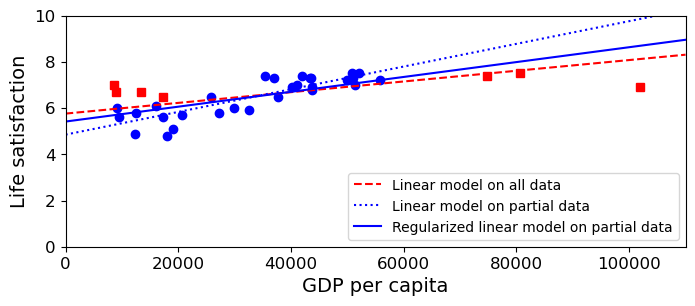

In [159]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, theta0 + theta1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
#ridge = linear_model.Ridge()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

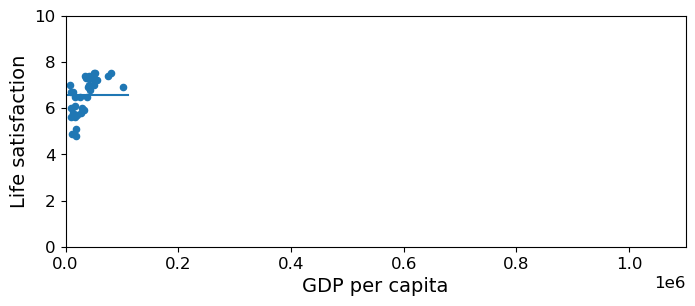

In [87]:
full_country_stats.plot(kind='scatter', x="GDP per capita", 
                        y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110_0000, 0, 10])
X = np.linspace(0, 110000, 1000)


poly = preprocessing.PolynomialFeatures(degree=20, include_bias=True)
scaler = preprocessing.StandardScaler()
ridge2 = linear_model.Ridge(alpha=10**9.5)

pipeline_ridge = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', ridge2)])
# Train on the full GDP dataset for the sake of the picture
pipeline_ridge.fit(Xfull, yfull)

# Pass in a large set of sample GDP values from poor to rich 
Xvals = np.linspace(0, 110000, 1000)
# ... as a DF as per training
X = pd.DataFrame(Xvals, columns=["GDP per capita"])
curve_ridge = pipeline_ridge.predict(X)
plt.plot(Xvals, curve_ridge)
plt.show()

In [ ]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, theta0 + theta1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
#ridge = linear_model.Ridge()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

## Summary thus far

 We'll conclude with some general regression tips. 
 
 1.  Choose your features wisely.
 2.  Learn about smoothing and regularization.
 3.  Explore (cautiously) models of regression other than linear.

### K Nearest Neighbor Regression

In this section we intrdouce a non-linear regression algorithm, the K Nearest Neighbor algorithm.
Having introduced the idea of non-linear regressors with the example of a polynomial regressor,
we look at a much more constrained, and in many ways more successful example here.

The code below will also provide you with a model to use when implementing new kinds of models using `scikit_learn`. 

####  Reloading the data used earlier in this NB

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import neighbors
from matplotlib import pyplot as plt


notebook_lifesat_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/'
lifesat_url = notebook_lifesat_url0.replace('github', 'raw.githubusercontent')
lifesat_url = lifesat_url.replace('blob/','')

def load_lifesat_data (lifesat_url):
    oecd_file = 'oecd_bli_2015.csv'
    oecd_url= f'{lifesat_url}{oecd_file}'
    return pd.read_csv(oecd_url, thousands=',',encoding='utf-8')



#backup = oecd_bli, gdp_per_capita
# Downloaded data from http://goo.gl/j1MSKe (=> imf.org) to github
def load_gdp_data ():
    gdp_file = "gdp_per_capita.csv"
    gdp_url = f'{lifesat_url}{gdp_file}'
    return pd.read_csv(gdp_url, thousands=',', delimiter='\t',
                                 encoding='latin1', na_values="n/a")
    

def prepare_country_stats(oecd_bli):
    """
    This would normally do prep work,including the train/test split.
    For now just redoing the steps whereby we merged gdp info with
    the original life-satisfaction data. and split training and test
    """
    oecd_bli = load_lifesat_data(lifesat_url)
    print(len(oecd_bli))
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    print(len(oecd_bli))
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita = load_gdp_data()
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # Make "Country" the index column.  We are going to merge data on this column.
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                                   left_index=True, right_index=True)
    #raise Exception
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats

def split_full_country_stats (full_country_stats):
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    #Train on this!
    training_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    #Test on this!
    test_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
    return training_data, test_data


In [2]:

# Prepare the data
oecd_bli = load_lifesat_data(lifesat_url)
full_country_stats = prepare_country_stats(oecd_bli)
training_data,test_data = split_full_country_stats(full_country_stats)

# The np.c_ makes both X and y  2D arrays
X_train = np.c_[training_data["GDP per capita"]]
X_test = np.c_[test_data["GDP per capita"]]

y_train = np.c_[training_data["Life satisfaction"]]
y_test = np.c_[test_data["Life satisfaction"]]

3292
888


###  Introducing statsmodels and more non-linearity

Let's look at some fictional count data.

Imagine you are trying to predict the number of events
occurring in intervals of various sizes. For example, suppose you know that on average there are 48 rainy days a year, and you want to collect data for time-intervals of various sizes.  You go ahead
and select intervals of 1,2, $\dots$ months and count up how many days of rain
there in each.  So, you might have data for 10 different 3-month periods and you might have
different day counts for each of those.  Eventually your data set might look a bit
like the dark red points in the plot below:

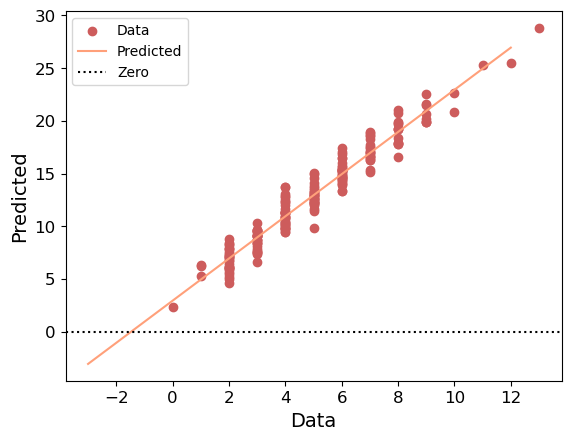

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

N, intcpt,slope = 200,3,2
rng = np.random.default_rng(seed=51)
noise = rng.normal(0,1,N)
#noise=0
x = rng.poisson(5,N)
# Noisy frequency data
y = (slope * x  + intcpt) + noise

lin1 = LinearRegression()
lin1.fit(x.reshape(-1, 1), y)

# test counts
x_test = np.array(range(-3, 13))  # Prediction line includes neg vals
y_pred = lin1.predict(x_test.reshape(-1, 1))

# Plotting The data 
plt.scatter(x, y, color='indianred', label='Data')
plt.plot(x_test, y_pred, color='lightsalmon', label='Predicted')
plt.axhline(0, color='k', linestyle=':', label='Zero')
plt.xlabel('Data')
plt.ylabel('Predicted')
plt.legend()
plt.show()

The data is the dark red dots, which are stacked over integer values of x because they represent counts. The salmon-colored line running through the points is the model's predictions, which of course are continuous (there are predictions for both integer and non-integer x-values), and include predictions
for negative x-values as well.

The visual given above does not make the facts very clear.  Here's a hard numerical look,

In [132]:
from nltk import FreqDist
fd = FreqDist(x)
fd

FreqDist({4: 34, 6: 31, 5: 29, 2: 28, 3: 27, 7: 20, 8: 14, 9: 8, 1: 3, 10: 2, ...})

As the `FreqDist` tells us, there are actually 34 scatterpoints overlapping one another above x = 5, each potentially associated with slightly different y-values by passing though a fixed linear function and adding a little noise.  But it's hard to see that because the points are close enough together to overlap.  And so it becomes impossible to see that there are slightly fewer points above x=5 than there are above x=4. 

This is count data, a prime example of data for which linear models are not a good fit.  An alternative in
that case is a non linear model like the KNN model above.  Another alternative
is a **slightly** non linear model, like a loglinear model.  Still a more general alternative
is **Generalized Linear Model (or GLM)**, which builds a linear model for some transformed version
of the data.  The transformations include a broad class of mathematical transformations.

One example of a GLM is the Poisson Regressor, whose exact mathematical definition we will
set aside for now.  Let's try one out, and introduce a new statistical learning
package in the bargain, `statsmodels`, which is more geared to traditional statistical analysis
than `scikit_learn`, and will probably be fairly comfortable for R-users.

Let's introduce a `statsmodels` data set as well.

In [133]:
# You will probably need to install this using conda or pip
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

data = sm.datasets.scotland.load()
## The n-Dimensional x part (independent var) train + test: a DataFrame
X_train = sm.add_constant(data.exog[:-10])
X_test = sm.add_constant(data.exog[-10:])
## The y part (dependent var) train + test
Y_train = data.endog[:-10]
Y_test = data.endog[-10:]

In [53]:
print(sm.datasets.scotland.DESCRLONG)


This data is based on the example in Gill and describes the proportion of
voters who voted Yes to grant the Scottish Parliament taxation powers.
The data are divided into 32 council districts.  This example's explanatory
variables include the amount of council tax collected in pounds sterling as
of April 1997 per two adults before adjustments, the female percentage of
total claims for unemployment benefits as of January, 1998, the standardized
mortality rate (UK is 100), the percentage of labor force participation,
regional GDP, the percentage of children aged 5 to 15, and an interaction term
between female unemployment and the council tax.

The original source files and variable information are included in
/scotland/src/



In [154]:
print(sm.datasets.scotland.NOTE)

::

    Number of Observations - 32 (1 for each Scottish district)

    Number of Variables - 8

    Variable name definitions::

        YES    - Proportion voting yes to granting taxation powers to the
                 Scottish parliament.
        COUTAX - Amount of council tax collected in pounds steling as of
                 April '97
        UNEMPF - Female percentage of total unemployment benefits claims as of
                January 1998
        MOR    - The standardized mortality rate (UK is 100)
        ACT    - Labor force participation (Short for active)
        GDP    - GDP per county
        AGE    - Percentage of children aged 5 to 15 in the county
        COUTAX_FEMALEUNEMP - Interaction between COUTAX and UNEMPF

    Council district names are included in the data file, though are not
    returned by load.



As noted in the long description, the independent variable is `YES`, the proportion voting yes on granting taxation powers.

In [134]:
data.endog[:5]

0    60.3
1    52.3
2    53.4
3    57.0
4    68.7
Name: YES, dtype: float64

The 7 independent variables in the  `scotland` Data are in a DataFrame, to which we've added
a constant-value column:

In [135]:
sm.add_constant(data.exog)[:5]

,const,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,1.0,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,1.0,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,1.0,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,1.0,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,1.0,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0


We train and test a linear regression model:

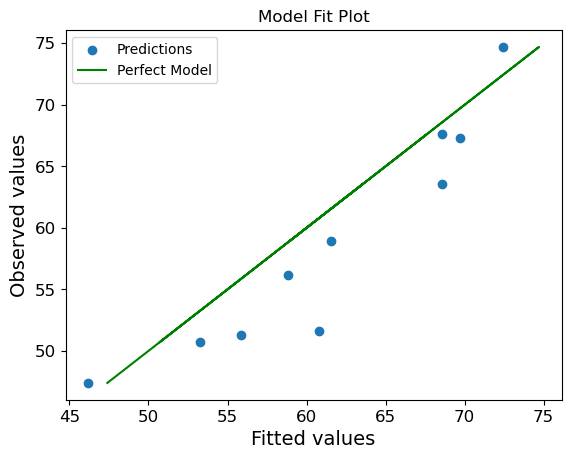

In [136]:
lin1 = LinearRegression()
lin1.fit(X_train, Y_train)

# predicted counts
y_pred = lin1.predict(X_test)

fig, ax = plt.subplots()
y,yhat = Y_test,y_pred
ax.scatter(yhat, y, label="Predictions")
ax.plot(y,y, c="green", label="Perfect Model")
ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.legend()

Good performance means all points are close to the x=y ("Perfect Model") line: Model predictions agree 
with observations.  The points fall well off the diagonal.

Measured performance is good, but not great.

In [137]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y,yhat), mean_squared_error(y,yhat)

(0.7770082153703575, 16.407757812227555)

This may be case where using  a linear model is not the best option.

Below we try a Poisson Regressor from the `statsmodel` package on the same dataset, training and testing the model, `statsmodel` style.

In [138]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


#data = sm.datasets.scotland.load()
## The x part (independent var)
data.exog = sm.add_constant(data.exog)
X_train = data.exog[:-10]
X_test = data.exog[-10:]
## The y part (dependent var) train & test
Y_train = data.endog[:-10]
Y_test = data.endog[-10:]
## Args passed in y,x order (R-like syntax y ~ x)
poisson_model = sm.GLM(Y_train, X_train, family=sm.families.Poisson())
## The fit model is a different object, in fact different kind of object, than the unfit model
poisson_results = poisson_model.fit()
scotland_pred = poisson_results.predict(X_test)
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   22
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.423
Date:                Wed, 20 Mar 2024   Deviance:                       3.5031
Time:                        16:05:14   Pearson chi2:                     3.42
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.0634      2

We now compare the actual and predicted values, as with the linear model.

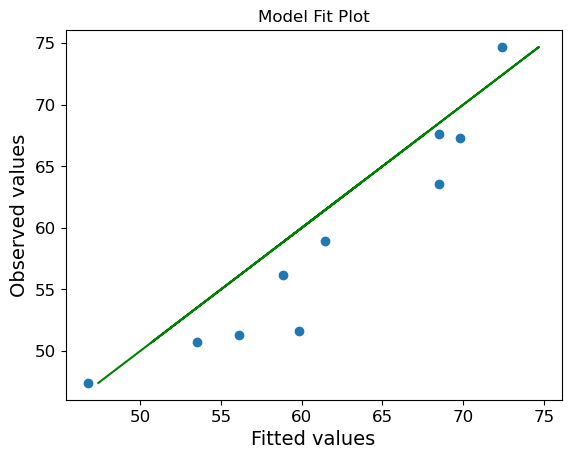

In [139]:
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
y,yhat = Y_test,scotland_pred
ax.scatter(yhat, y)
ax.plot(y,y, c="green", label="Perfect Model")
#line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
#abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

And we see a slight improvement in R2 and MSE performance:

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y,yhat), mean_squared_error(y,yhat)

(0.7982514024467178, 14.844681982830261)

#### Training and evaluation

The following demonstrates in principle how to build a regressor that uses
an instance of the  scikit learn `Pipeline` class, which was first demonstrated
in the polynomial regression example earlier in this NB.

The example is trivial since scaling the data has no effect on regression 
with one independent variable,  but the code model is solid, and will
extend easily to more complicated (and more useful) pipelines.

In [141]:
y_train.shape

(29, 1)

Lin Training R2: 0.73
KNN Training R2: 0.91


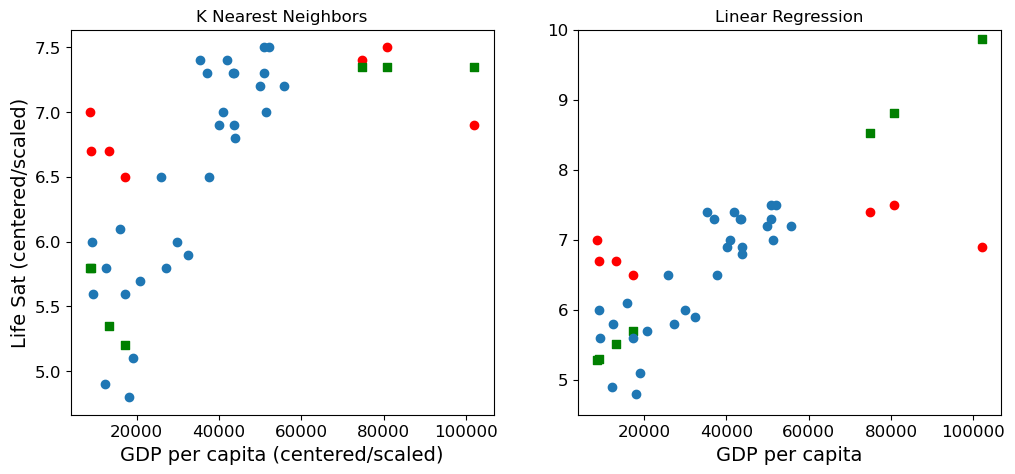

In [162]:
#######################################################################
#
#   Training
#
########################################################################

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline


##  Create the linear model pipeline
scaler2 = preprocessing.StandardScaler()
# select and train a linear regression model 
lin_reg2 = linear_model.LinearRegression()
pipeline_reg3 = pipeline.Pipeline([('scal', scaler2), ('lin', lin_reg2)])

##  Create the KNN model pipeline
# Select and train a k-neighbors regression model, supplying values for important parameters
knn_reg_model = neighbors.KNeighborsRegressor(n_neighbors=2)
scaler3 = preprocessing.StandardScaler()
knn_pipeline = pipeline.Pipeline([('scal', scaler3), ('knn', knn_reg_model)])



# select and train a linear regression model
pipeline_reg3.fit(X_train, y_train)
print(f"Lin Training R2: {pipeline_reg3.score(X_train, y_train):.2f}")

# Train the model (always the .fit() method in sklearn, even with a pipeline)
# Unlike the usual version of scaling, for KNN regression we scale the 
#points = np.concatenate([X_train,y_train],axis=1)
#scaler5 = preprocessing.StandardScaler()
#points_s = scaler5.fit_transform(points)
#X_train_s,y_train_s = points_s[:,0:1],points_s[:,1:2]
knn_pipeline.fit(X_train, y_train)
print(f"KNN Training R2: {knn_pipeline.score(X_train, y_train):.2f}")

# Train the model
#######################################################################
#
#   Testing
#
########################################################################

# Use models to predict y vals on test data.
#Yp = knn_reg_model.predict(X_test)  # Not using a pipeline
#t_points = np.concatenate([X_test,y_test],axis=1)
#t_points_s = scaler5.transform(t_points)
#X_test_s,y_test_s = t_points_s[:,0:1],t_points_s[:,1:2]
#X_test_s,y_test_s = X_test,scaler5.transform(y_test)
#knn_pipeline.fit(X_train_s, y_train_s)
#Yp = knn_pipeline.predict(X_test_s)
Yp = knn_pipeline.predict(X_test)

#Yp3 = lin_reg_model3.predict(X_test)  # Not using a pipeline
Yp3 = pipeline_reg3.predict(X_test)

#######################################################################
#
#   Plotting
#
########################################################################

# Set up a figure 
f = plt.figure(figsize=(12,5))
#  Add 2 plots side by side
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

#######################################
# Model 1 plot
#######################################
# Put test points in plot, color red
#ax.scatter(Xm, Ym, c="r",marker="o")
ax.scatter(X_test, y_test, c="r",marker="o")
# Put  predicted test points in plot color grren
#ax.scatter(Xm, Yp, c="g",marker="s")
ax.scatter(X_test, Yp, c="g",marker="s")
# Put training data in plot; let matplotlib choose the color.
# It will choose a color not yet used in this axis.
ax.scatter(X_train,y_train)
# plot parameters
#ax.set_ylim([4.5,10])
ax.set_title('K Nearest Neighbors')
ax.set_xlabel('GDP per capita (centered/scaled)')
ax.set_ylabel('Life Sat (centered/scaled)')

#######################################
# Model 2 plot
#######################################
#ax2.scatter(Xm, Ym, c="r",marker="o")
ax2.scatter(X_test, y_test, c="r",marker="o")
#ax2.scatter(Xm, Yp3, c="g",marker="s")
ax2.scatter(X_test, Yp3, c="g",marker="s")
ax2.scatter(X_train, y_train)
# plot parameters
ax2.set_ylim([4.5,10])
ax2.set_xlabel('GDP per capita')
ax2.set_title('Linear Regression')

# Not usually needed in a NB but okay
plt.show()
########################################################################

#oecd_bli, gdp_per_capita = backup


The blue points are the training data and the red points are the test data.
The green points are the predicted locations of the red points (using the GDP, the x-value, to predict the Life Satisfaction, the y-value).  Comparing the red points with the blue training data points, we see the test points are distinct outliers.   

In the linear regression graph, as expected, the green points lie on a line chosen based on the blue points, the training data.  Because the data does not lie on a line, the linear model ends up having two flaws.  It underestimates the life satisfaction of poor folks in the test set, and overestimates that of rich folks. 

The predicted K Nearest Neighbor points do **not** lie on a line.  This is because
the K Nearest Neighbor regressor is **not** a linear model.  It is a more powerful, more flexible model and does a better job predicting here, in the sense that there is less spread between the red and green points. This is also seen in the improved training R2 score; more accuracy has been achieved in fitting the training data.   Despite the fact that the training data lacks high GDP countries, the K Nearest Neighbor model seems to capture the fact that life satisfaction levels off with GDPs above 60K.  

The KNN regressor is a very simple idea.  Training is trivial: store the training set in the model.
At test time when predicting the regression value for $x$ find the the $k$ nearest training points
to $x$ and average their target values, possibly weighting their contribution by their distance from $x$. To make the idea clearer, let's suppose we are using two independent variables to predict with instead of the one variable we used above.  We'll use the life satisfaction data, but treat both life satisfaction and GDP as the independent variables; they will be used to predict some other variable, let's say life expectancy. The idea of KNN is to divide the plane up into cells defined by the training data, as shown in the plot below,  which is called a Voronoi diagram:

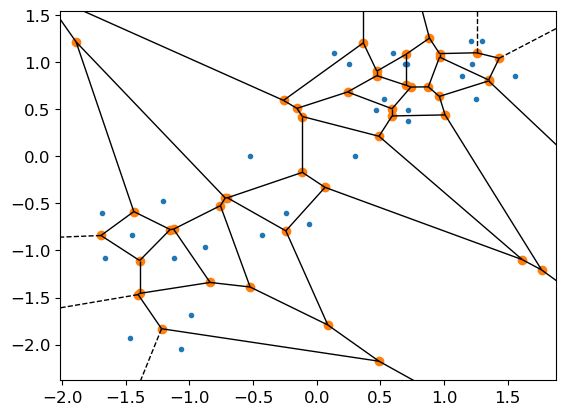

In [163]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.concatenate([X_train,y_train],axis=1)
# Need to scale both X_train and y_train to make the diagram look at all comprehensible
scaler4 = preprocessing.StandardScaler()
points_s = scaler4.fit_transform(points)
vor = Voronoi(points_s)
fig = voronoi_plot_2d(vor)
plt.show()

Pick any polygon with orange vertices and call it X; call the single
blue training point in X P. Any test point falling within polygon X
has training point P as its nearest neighbor. Its other nearest neighbors will
be the training points in the adjoining polygons.  For example, suppose that $k$, the number of nearest neighbors to be used, is 3; and suppose that the test point fell on the orange vertex at about (-1.7,-.8).  That point has 3 equally distant nearest neighbors. The predicted target value is the average of the target values of those 3 training points.

So the model can predict values that lie at the intersections of complicated arrangements of line segments.  At the same time, it's very constrained by the Voronoi structure. What it's doing is quite far from the 
kind of memorizing of the training set we saw with the polynomial model.

It is still a bad model, but it is the best we have seen so far:

In [164]:
knn_mse = mean_squared_error (Yp, y_test)
knn_r2 = r2_score (y_test,Yp)
knn_mse, knn_r2

(0.8557142857142864, -6.155290102389083)

Reviewing our linear model results:

In [76]:
lin3_mse = mean_squared_error (Yp3, y_test)
lin3_r2 = r2_score (y_test,Yp3)
lin3_mse, lin3_r2

(2.6818932487474605, -21.425387233553845)

Both the models had respectable $R^2$ scores on the training data, but the performance of the  K Nearest Neighbor model degrades less on the test data. Thus the K Nearest Neighbor model,
though non-linear, seems to be show less overfitting than the linear model.

####  Adding more variables to the pipeline

We can of course play the same game with KNN that we played the linear regressor
earlier in this notebook.  We can add variables.

**Warning**:  Running the KNN regressor with multiple variable 
seems to be a bit unpredictable.  I have had some kernel crashes
I can't really explain, and my best guess is that they are due to memory issues,
but this is far from clear.  For best results, in doing the following experiments, restart your kernel,
re-execute the **first** cell after the heading **Reloading the data used earlier in this NB** 
(which defines the code used below to lead data, but does not load the data).   This should give you a clean Python image to play with.

We choose some lifesat predictors and retrain and re-evaluate:

In [41]:
oecd_bli = load_lifesat_data(lifesat_url)
full_country_stats = prepare_country_stats(oecd_bli)

predictors = ['Household net financial wealth', 
              'Job security', 'Rooms per person',
              'Life expectancy','Homicide rate',
              'Long-term unemployment rate']

# Try even more variables at your own risk!
#num_ignored=6
#predictors = full_country_stats.columns[:-num_ignored])
predicted ='Life satisfaction'

try:
   predictors.remove(predicted)
except ValueError as e:
    print(f"{predicted} has already been removed from the predictors list")

# Linear Model with our new predictors 
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))


#Train on this!
sample_data3 = full_country_stats[predictors].iloc[keep_indices]
#Test on this!
missing_data3 = full_country_stats[predictors].iloc[remove_indices]

# Scikit learn will accept a Pandas DataFrame for training data!
Xsample3 = sample_data3[predictors]
Xtest_sample3 = missing_data3[predictors]

ytrain = full_country_stats['Life satisfaction'].iloc[keep_indices]
ytest = full_country_stats['Life satisfaction'].iloc[remove_indices]

3292
888
Life satisfaction has already been removed from the predictors list


In [42]:
##  Create the KNN model pipeline
# Select and train a k-neighbors regression model, supplying values for important parameters
knn_LS_model = neighbors.KNeighborsRegressor(n_neighbors=3)
scaler_LS = preprocessing.StandardScaler()
knn_LS_pipeline = pipeline.Pipeline([('scal', scaler_LS), ('knn', knn_LS_model)])
# Train the model (always the .fit() method in sklearn)
knn_LS_pipeline.fit(Xsample3, ytrain)

Pipeline(steps=[('scal', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

And a modest improvement ensues in both MSE and $R^2$, although we have still not reached the baseline.

In [43]:
Yp_LS = knn_LS_pipeline.predict(Xtest_sample3)
knn_LS_mse = mean_squared_error (Yp_LS, ytest)
knn_LS_r2 = r2_score (ytest,Yp_LS)
#(0.2976190476190477, -1.488623435722412)
knn_LS_mse, knn_LS_r2

(0.2976190476190477, -1.488623435722412)

Note that if all we care about in evaluating is the $R^2$ score, we can also do:

In [44]:
knn_LS_pipeline.score(Xtest_sample3,ytest)

-1.488623435722412

In [1]:
import numpy as np
x = np.random.normal(5, 2, 100) 

In [6]:
x.std()

1.6865077487564506